In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import time

### Цветкова Алена ИУ5-21М, Вариант 13

In [25]:
data = pd.read_csv("archive/train.csv")

In [28]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


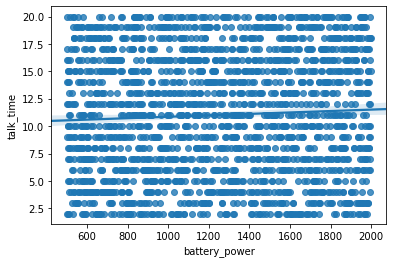

In [38]:
sns.regplot(x=data["battery_power"], y=data["talk_time"])

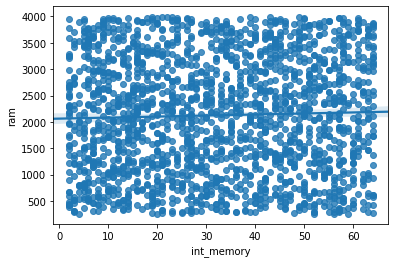

In [10]:
sns.regplot(x=data["int_memory"], y=data["ram"])

### Задача №13.
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "обратная зависимость - 1 / X".

In [11]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

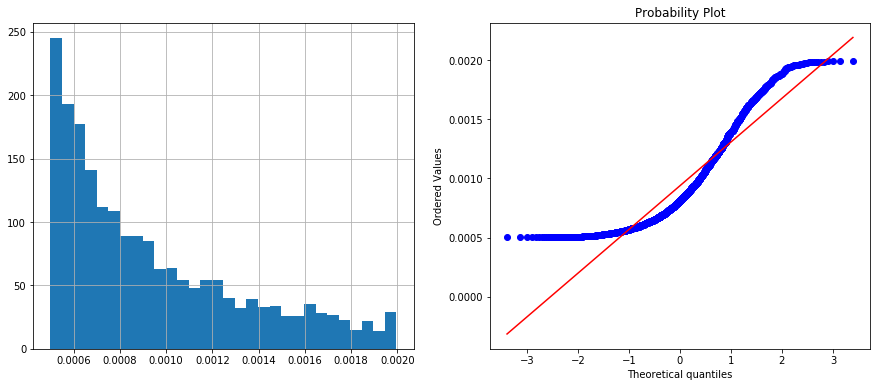

In [14]:
data['battery_power_reciprocal'] = 1 / (data['battery_power']) 
diagnostic_plots(data, 'battery_power_reciprocal')

### Задача №33.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), алгоритм полного перебора (exhaustive feature selection).

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
data_x = data.drop(columns=['price_range'])
data_y = data['price_range']

In [43]:
%%time
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_x, data_y, custom_feature_names=data_x.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 6175/6175

Best accuracy score: 0.92
Best subset (indices): (0, 11, 12, 13)
Best subset (corresponding names): ('battery_power', 'px_height', 'px_width', 'ram')
CPU times: user 9min 35s, sys: 4 s, total: 9min 39s
Wall time: 9min 43s
